## Geometrical angle constraint

Below is the example of application of langrange multipliers to minimization problem.

Angle constraint between three points $\textbf{p}_1=[x_1, y_1]^T$, $\textbf{p}_2=[x_2, y_2]^T$, $\textbf{p}_3=[x_3, y_3]^T$ is described using the following equation:

$$s=|(\textbf{p}_1-\textbf{p}_2)\times(\textbf{p}_3 - \textbf{p}_2)|$$
$$c=(\textbf{p}_1-\textbf{p}_2)\cdot(\textbf{p}_3 - \textbf{p}_2)$$ 

$$arctan(\frac{s}{c})= \alpha $$ or, with some restrictions
$$\frac{s}{c} = tan(\alpha)$$

Then let's define function to minimize

$$F=\frac{1}{2}(|\textbf{p}_1-\textbf{p}_1^{(0)}|^2 + |\textbf{p}_2-\textbf{p}_2^{(0)}|^2 + |\textbf{p}_3-\textbf{p}_3^{(0)}|^2) + \lambda (arctg(\frac{s}{c} - \alpha))$$

Or let's focus on more practical case with the following constraints: 

$$F=\frac{1}{2}(|\textbf{p}_1-\textbf{p}_1^{(0)}|^2 + |\textbf{p}_2-\textbf{p}_2^{(0)}|^2 + |\textbf{p}_3-\textbf{p}_3^{(0)}|^2) + \lambda (arctg(\frac{s}{c} - \alpha)) + \mu ( (\textbf{p}_1-\textbf{p}_2)^2 - d_1^2  ) + \omega ( ((\textbf{p}_3-\textbf{p}_2))^2 - d_2^2 ) $$

$$ \textbf{p}_2 = const $$

$$ d_1^2 = (\textbf{p}_1^{(0)}-\textbf{p}_2^{(0)})^2 $$
$$ d_2^2 = (\textbf{p}_3^{(0)}-\textbf{p}_2^{(0)})^2 $$


$$ (\textbf{p}_1-\textbf{p}_2)^2 = (x_1 - x_2)^2 + (y_1 - y_2)^2 $$
$$ (\textbf{p}_3-\textbf{p}_2)^2 = (x_3 - x_2)^2 + (y_3 - y_2)^2 $$

We would come the the following equations:

$$ s = (x_1 - x_2)(y_3 - y_2) - (x_3 - x_2)(y_1 - y_2)$$
$$ c = (x_1 - x_2)(x_3 - x_2) + (y_1 - y_2) (y_3 - y_2)$$

$$ \partial arctan (\frac{s}{c}) = \frac{1}{1 + (\frac{s}{c})^2}( \partial s\frac{1}{c} - \partial c \frac{s}{c^2} )  = \frac{1}{c^2 + s^2}( \partial s\ * c - \partial c * s )$$

$$x_1-x_1^{0}+\lambda \frac{c(y_3-y_2)-s(x_3-x_2)}{s^2+c^2} + \mu ( 2(x_1 - x_2) ) = 0$$
$$y_1-y_1^{0}+\lambda \frac{-c(x_3-x_2)-s(y_3-y_2)}{s^2+c^2} + \mu ( 2(y_1 - y_2) ) = 0$$
$$x_3-x_3^{0}+\lambda \frac{-c(y_1-y_2)-s(x_1-x_2)}{s^2+c^2} - \omega ( 2(x_3 - x_2) ) = 0$$
$$y_3-y_3^{0}+\lambda \frac{c(x_1-x_2)-s(y_1-y_2)}{s^2+c^2} - \omega (2 (y_3 - y_2) ) = 0$$
$$arctan(\frac{s}{c})= \alpha $$
$$ (x_1 - x_2)^2 + (y_1 - y_2)^2 = d_1^2 $$
$$ (x_3 - x_2)^2 + (y_3 - y_2)^2 = d_2^2 $$




Let's try system of 7 equations with 7 unknowns $x_1, y_1, x_3, y_3, \lambda,\mu,\omega $ using Newton or  modified Newton iterative method.

$$ x^{(r+1)} = x^{(r)} - (F'(x^{(r)}))^{-1} f(x^{(r)})  $$
$$ x^{(r+1)} = x^{(r)} - (F'(x^{(0)}))^{-1} f(x^{(r)})  $$




Let's determine $F'$ matrix for our system of equations:

$$ s = (x_1 - x_2)(y_3 - y_2) - (x_3 - x_2)(y_1 - y_2)$$
$$ c = (x_1 - x_2)(x_3 - x_2) + (y_1 - y_2) (y_3 - y_2)$$

$$  \partial (\frac{1}{s^2 + c^2}) = - 2 \frac{s * \partial s  +  c *\partial c}{(s^2 + c^2)^2} $$


In [127]:
from __future__ import division
from sympy import *

x_1, y_1, x_2, y_2, x_3, y_3, _lambda, mu, omega, alpha = symbols('x_1 y_1 x_2 y_2 x_3 y_3 lambda mu omega alpha')
s = (x_1 - x_2)*(y_3 - y_2) - (x_3 - x_2)*(y_1 - y_2)
c = (x_1 - x_2)*(x_3 - x_2) + (y_1 - y_2)*(y_3 - y_2)

x0_1, y0_1, x0_2, y0_2, x0_3, y0_3 = symbols('x0_1 y0_1 x0_2 y0_2 x0_3 y0_3')


d1 = (x0_1 - x0_2)**2 + (y0_1 - y0_2)**2
d2 = (x0_3 - x0_2)**2 + (y0_3 - y0_2)**2

init_printing(use_unicode=True)


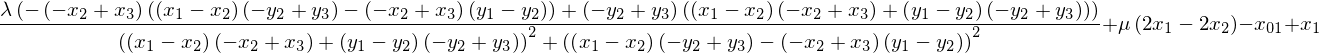

In [128]:
f_1 = x_1-x0_1 + _lambda * (c*(y_3-y_2)-s*(x_3-x_2))/(s**2+c**2) + mu*( 2*(x_1 - x_2) ) 

f_11 = diff(f_1, x_1)
f_12 = diff(f_1, y_1)
f_13 = diff(f_1, x_3)
f_14 = diff(f_1, y_3)
f_15 = diff(f_1, _lambda)
f_16 = diff(f_1, mu)
f_17 = diff(f_1, omega)

f_1


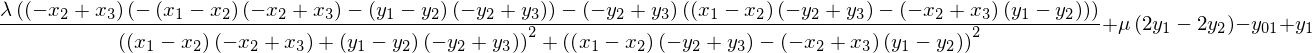

In [129]:
f_2 = y_1 - y0_1 + _lambda*(-c*(x_3-x_2)-s*(y_3-y_2))/(s**2+c**2) + mu*(2*(y_1 - y_2))  

f_21 = diff(f_2, x_1)
f_22 = diff(f_2, y_1)
f_23 = diff(f_2, x_3)
f_24 = diff(f_2, y_3)
f_25 = diff(f_2, _lambda)
f_26 = diff(f_2, mu)
f_27 = diff(f_2, omega)

f_2

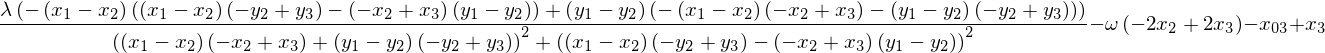

In [130]:
f_3 = x_3 - x0_3 + _lambda * (-c*(y_1-y_2)-s*(x_1-x_2))/(s**2+c**2) - omega*(2*(x_3 - x_2) ) 

f_31 = diff(f_3, x_1)
f_32 = diff(f_3, y_1)
f_33 = diff(f_3, x_3)
f_34 = diff(f_3, y_3)
f_35 = diff(f_3, _lambda)
f_36 = diff(f_3, mu)
f_37 = diff(f_3, omega)

f_3

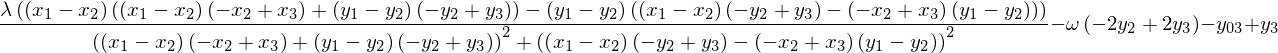

In [131]:
f_4 = y_3 - y0_3 + _lambda*(c*(x_1-x_2)-s*(y_1-y_2))/(s**2+c**2) - omega*(2*(y_3 - y_2))


f_41 = diff(f_4, x_1)
f_42 = diff(f_4, y_1)
f_43 = diff(f_4, x_3)
f_44 = diff(f_4, y_3)
f_45 = diff(f_4, _lambda)
f_46 = diff(f_4, mu)
f_47 = diff(f_4, omega)

f_4

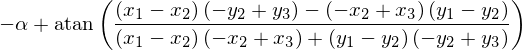

In [132]:
f_5 = atan(s/c) - alpha

f_51 = diff(f_5, x_1)
f_52 = diff(f_5, y_1)
f_53 = diff(f_5, x_3)
f_54 = diff(f_5, y_3)
f_55 = diff(f_5, _lambda)
f_56 = diff(f_5, mu)
f_57 = diff(f_5, omega)

f_5

In [133]:
f_6 = (x_1 - x_2)**2 + (y_1 - y_2)**2 - d1

f_61 = diff(f_6, x_1)
f_62 = diff(f_6, y_1)
f_63 = diff(f_6, x_3)
f_64 = diff(f_6, y_3)
f_65 = diff(f_6, _lambda)
f_66 = diff(f_6, mu)
f_67 = diff(f_6, omega)

f_6

In [134]:
f_7 = (x_3 - x_2)**2 + (y_3 - y_2)**2 - d2

f_71 = diff(f_7, x_1)
f_72 = diff(f_7, y_1)
f_73 = diff(f_7, x_3)
f_74 = diff(f_7, y_3)
f_75 = diff(f_7, _lambda)
f_76 = diff(f_7, mu)
f_77 = diff(f_7, omega)

f_7

Let's evaluate expressions on some example

In [301]:
import numpy as np

data = { x0_1 : 0.0, y0_1 : 1.0, 
         x0_2 : 0.0, y0_2 : 0.0, 
         x0_3 : 1.0, y0_3 : 1.0,
         alpha : pi/6.0,
         _lambda : 0.0,
         mu : 0.0,
         omega : 0.0,
         x_1 : 0.0, y_1 : 1.0, 
         x_2 : 0.0, y_2 : 0.0, 
         x_3 : 1.0, y_3 : 1.0,}



_F = [[f_11, f_12, f_13, f_14, f_15, f_16, f_17],
     [f_21, f_22, f_23, f_24, f_25, f_26, f_27],
     [f_31, f_32, f_33, f_34, f_35, f_36, f_37],
     [f_41, f_42, f_43, f_44, f_45, f_46, f_47],
     [f_51, f_52, f_53, f_54, f_55, f_56, f_57],
     [f_61, f_62, f_63, f_64, f_65, f_66, f_67],
     [f_71, f_72, f_73, f_74, f_75, f_76, f_77]]

from numpy.linalg import inv


In [317]:


__F = [];

for l in _F:
    for e in l:
        __F.append(e.evalf(subs=data, chop=True))

F = np.mat(np.array(__F, dtype=np.float).reshape((7,7)))

iF = inv(F)


In [318]:
ff = np.mat([f_1.evalf(subs=data, chop=True), 
      f_2.evalf(subs=data, chop=True),
      f_3.evalf(subs=data, chop=True),
      f_4.evalf(subs=data, chop=True),
      f_5.evalf(subs=data, chop=True),
      f_6.evalf(subs=data, chop=True),
      f_7.evalf(subs=data, chop=True)]).T


ii = (np.mat([data[x_1],
        data[y_1],
        data[x_3],
        data[y_3],
        data[_lambda],
        data[mu],
        data[omega]]).T - iF*ff).tolist()



In [320]:
data[x_1] = ii[0][0];
data[y_1] = ii[1][0];
data[x_3] = ii[2][0];
data[y_3] = ii[3][0];
data[_lambda] = ii[4][0];
data[mu] = ii[5][0];
data[omega] = ii[6][0];

data[x_1],data[y_1],data[x_3],data[y_3], data[x0_1],data[y0_1],data[x0_3],data[x0_3],((data[x_1]-data[x_2])**2 + (data[y_1]-data[y_2])**2), ((data[x_3]-data[x_2])**2 + (data[y_3]-data[y_2])**2), atan(s/c).evalf(subs=data, chop=True)/np.pi*180.0